In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('carprices.csv')
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


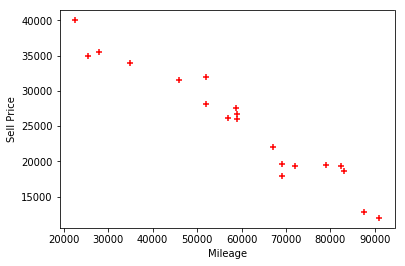

In [4]:
plt.xlabel('Mileage')
plt.ylabel('Sell Price')
plt.scatter(df['Mileage'],df['Sell Price($)'],color='red',marker='+')
plt.show()

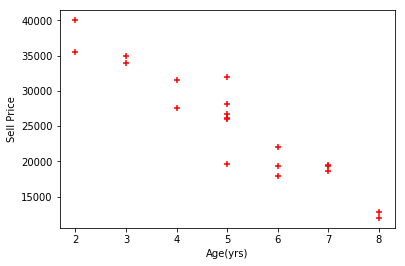

In [6]:
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price')
plt.scatter(df['Age(yrs)'],df['Sell Price($)'],color='red',marker='+')
plt.show()

In [7]:
df.corr()

,Mileage,Age(yrs),Sell Price($)
Mileage,1.000000,0.968290,-0.967173
Age(yrs),0.968290,1.000000,-0.941522
Sell Price($),-0.967173,-0.941522,1.000000


In [8]:
df.corr()['Sell Price($)']

Mileage         -0.967173
Age(yrs)        -0.941522
Sell Price($)    1.000000
Name: Sell Price($), dtype: float64

In [9]:
x = df[['Mileage','Age(yrs)']]
y = df['Sell Price($)']

In [10]:
x = df.drop(['Sell Price($)'], axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [13]:
X_train.head()

,Mileage,Age(yrs)
13,58780,4
2,57000,5
14,82450,7
8,91000,8
17,69000,5


In [14]:
X_test.head()

,Mileage,Age(yrs)
7,72000,6
10,83000,7
5,59000,5
6,52000,5
3,22500,2


In [15]:
X_train.head()

,Mileage,Age(yrs)
13,58780,4
2,57000,5
14,82450,7
8,91000,8
17,69000,5


In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
y_pred = lr.predict(X_test)

In [18]:
lr.score(X_test,y_test)

0.921242248377633

In [19]:
lr.score(X_train,y_train)

0.9384897023666824

In [22]:
result = X_test.copy()
result['Actual'] = y_test
result['Predicted'] = y_pred

In [23]:
result

,Mileage,Age(yrs),Actual,Predicted
7,72000,6,19300,20668.527226
10,83000,7,18700,16762.332422
5,59000,5,26750,25160.183810
6,52000,5,32000,27209.300039
3,22500,2,40000,37903.326337
18,87600,8,12800,14729.615313


In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

6537533.29138839